# Linear Discriminant Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import auc, confusion_matrix, classification_report, precision_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.utils.multiclass import unique_labels

In [4]:
data_default = pd.read_csv("default.csv",usecols = [1,2,3,4])
data_default.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [5]:
data_default_dummies = pd.get_dummies(data_default, drop_first = True)
print(data_default_dummies.head(5))
np.unique(data_default_dummies.default_Yes, return_counts = True)

       balance       income  default_Yes  student_Yes
0   729.526495  44361.62507            0            0
1   817.180407  12106.13470            0            1
2  1073.549164  31767.13895            0            0
3   529.250605  35704.49394            0            0
4   785.655883  38463.49588            0            0


(array([0, 1], dtype=uint8), array([9667,  333], dtype=int64))

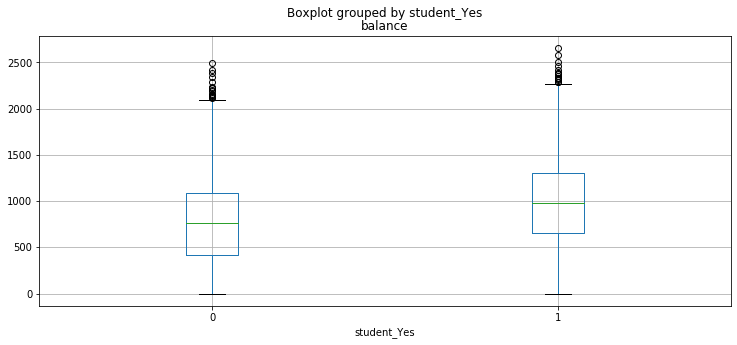

In [6]:
data_default_dummies.boxplot("balance","student_Yes", figsize = (12,5))
plt.show()

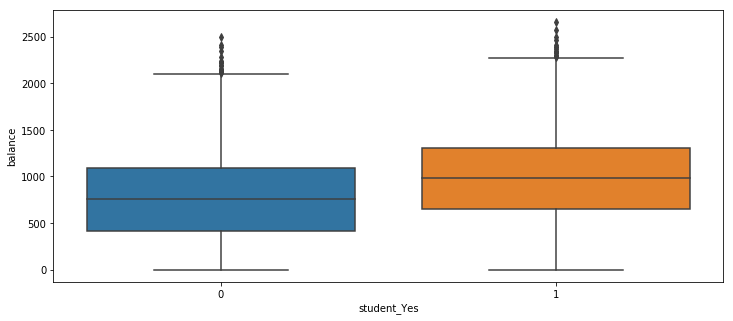

In [7]:
plt.figure(figsize = (12,5))
sns.boxplot(y = "balance", x = "student_Yes", data = data_default_dummies)
plt.show()

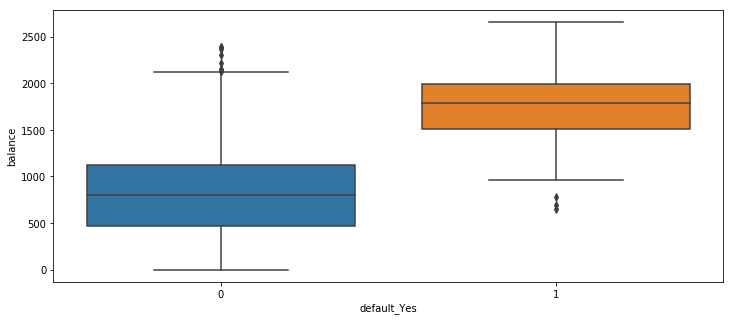

In [17]:
plt.figure(figsize = (12,5))
sns.boxplot(y = "balance", x = "default_Yes", data = data_default_dummies)
plt.show()

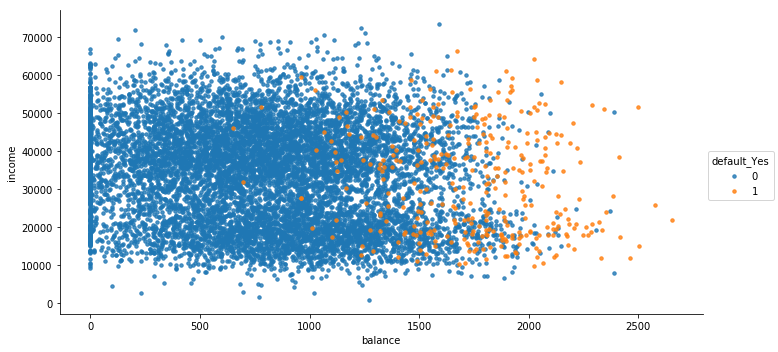

In [8]:
sns.lmplot(y = "income", x = "balance", data = data_default_dummies, 
           hue = 'default_Yes',fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

In [14]:
X = data_default_dummies.drop("default_Yes", axis = 1)
y = data_default_dummies.default_Yes
y = y.values
lda = LinearDiscriminantAnalysis(tol = 0.0000001)
mod_lda = lda.fit(X,y)
print(mod_lda)
print(mod_lda.score(X,y))
pred = mod_lda.predict(X)
pred_prob = mod_lda.predict_proba(X)
actual = y
print(pred_prob)
np.unique(pred, return_counts = True)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=1e-07)
0.9724
[[  9.96776483e-01   3.22351679e-03]
 [  9.97310469e-01   2.68953133e-03]
 [  9.85291400e-01   1.47085998e-02]
 ..., 
 [  9.93867912e-01   6.13208754e-03]
 [  8.62826402e-01   1.37173598e-01]
 [  9.99846451e-01   1.53549027e-04]]


(array([0, 1], dtype=uint8), array([9899,  101], dtype=int64))

In [16]:
tn, fp, fn, tp = confusion_matrix(y_true = actual, y_pred = pred, labels = np.array([0,1])).ravel()
print(tn, fp, fn, tp)

9645 22 254 79


Confusion matrix, without normalization
[[9645   22]
 [ 254   79]]


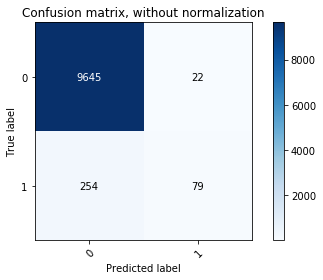

In [17]:
plot_confusion_matrix(y_true = actual, y_pred = pred, classes = np.array([0,1]))
plt.show()

In [18]:
print(classification_report(actual, pred, digits = 6))

             precision    recall  f1-score   support

          0   0.974341  0.997724  0.985894      9667
          1   0.782178  0.237237  0.364055       333

avg / total   0.967942  0.972400  0.965187     10000



In [19]:
fpr, tpr, thresholds = roc_curve(y_true = actual, y_score = pred_prob[:,0], pos_label = 0)
print(auc(fpr,tpr))

0.949520224683


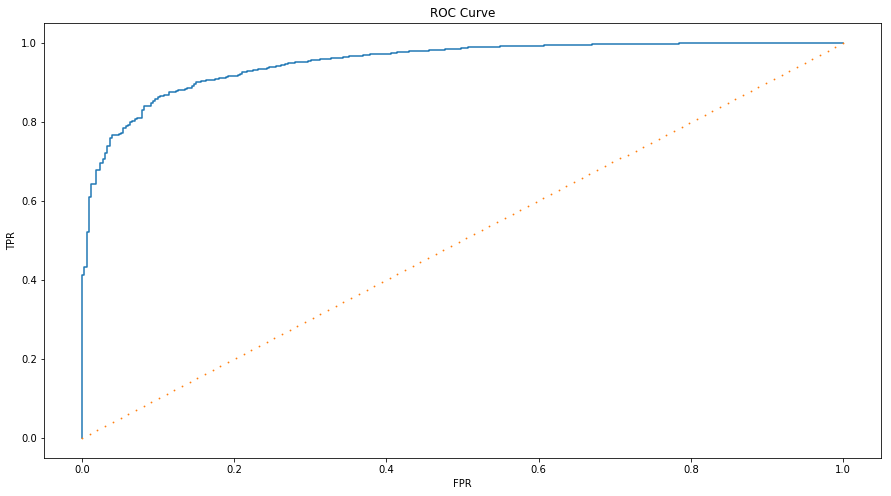

In [20]:
x= np.linspace(0,1,100)
plt.figure(figsize = (15,8)) 
plt.plot(fpr, tpr) 
plt.plot(x,x,".", markersize = 1.6) 
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [22]:
precision, recall, thresholds = precision_recall_curve(y_true = actual, probas_pred = pred_prob[:,1], pos_label = 1)
print(auc(recall,precision))

0.529022977424


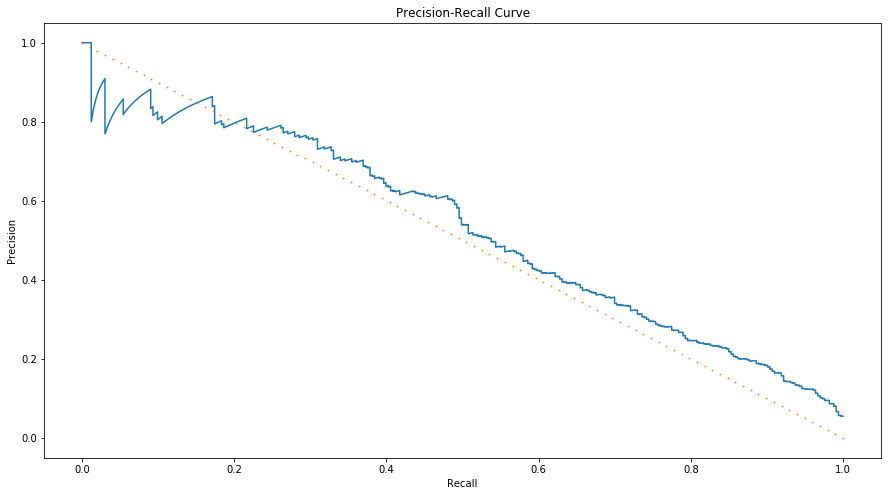

In [23]:
x= np.linspace(0,1,100)
plt.figure(figsize = (15,8)) 
plt.plot(recall, precision) 
plt.plot(x,-x+1,".", markersize = 1.6) 
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [24]:
average_precision_score(y_true = actual, y_score = pred_prob[:,1])

0.53007362314936701